<div id="header">
    <p style="color:black; text-align:center; font-weight:bold; font-family:Tahoma, sans-serif; font-size:24px;">
        K Nearest Neighbors
    </p>
</div>

<div style="background-color:#bfbfbf; padding:8px; border:2px dotted black; border-radius:8px; font-family:sans-serif; line-height: 1.7em">

KNN(K-Nearest Neighbors) employs an instance-based learning approach, where it retains all available cases and classifies new data by similarity. This method is classified as lazy learning since it doesn't develop a discriminative function from the training data. Instead, it memorizes the training dataset.

**WORKING OF KNN**

**Step 1: Selecting the optimal value of K**

K represents the number of nearest neighbors that needs to be considered while making prediction.

**Step 2: Calculating distance**

To measure the similarity between target and training data points, Euclidean distance is used. Distance is calculated between each of the data points in the dataset and target point.

**Step 3: Finding Nearest Neighbors**

The k data points with the smallest distances to the target point are the nearest neighbors.

The goal of this notebook is to implement the KNN algorithm from scratch, apply it to the **Airline Passenger Satisfaction** dataset, and determine the optimal value of `k` for prediction.
</div>



# **Importing Data**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [40]:
# Load the dataset
train_data = pd.read_csv("airline-passenger-satisfaction-train.csv")
test_data = pd.read_csv("airline-passenger-satisfaction-test.csv")

In [41]:
train_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [42]:
train_data.drop(['Unnamed: 0', 'id'], axis= 1, inplace= True)
test_data.drop(['Unnamed: 0', 'id'], axis= 1, inplace= True)

In [43]:
print(f"Number of rows in training data: {train_data.shape[0]}")
print(f"Number of rows in test data: {test_data.shape[0]}")

Number of rows in training data: 103904
Number of rows in test data: 25976


In [44]:
train_data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [45]:
cols = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

In [46]:
train_data[cols] = train_data[cols].astype(object)

In [47]:
sample_data = train_data.sample(1000)

# **Exploratory Data Analysis**

In [48]:
categorical_columns = train_data.select_dtypes(object).columns.to_list()
print(categorical_columns)
print()
numerical_columns = train_data.select_dtypes(np.number).columns.to_list()
print(numerical_columns)

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction']

['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


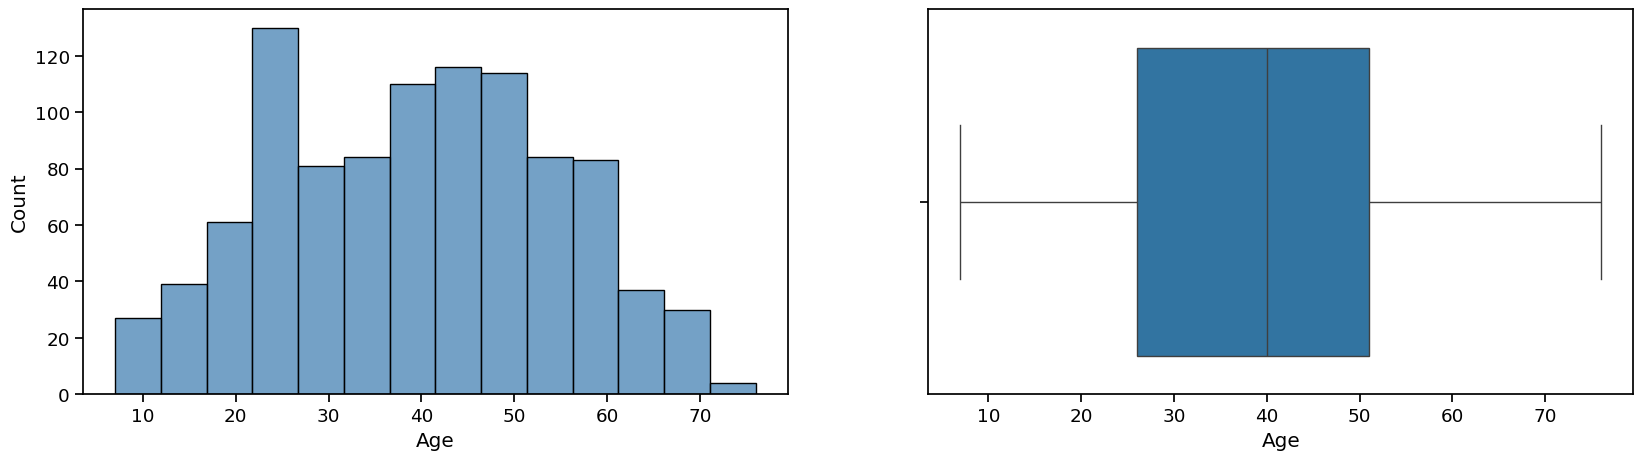

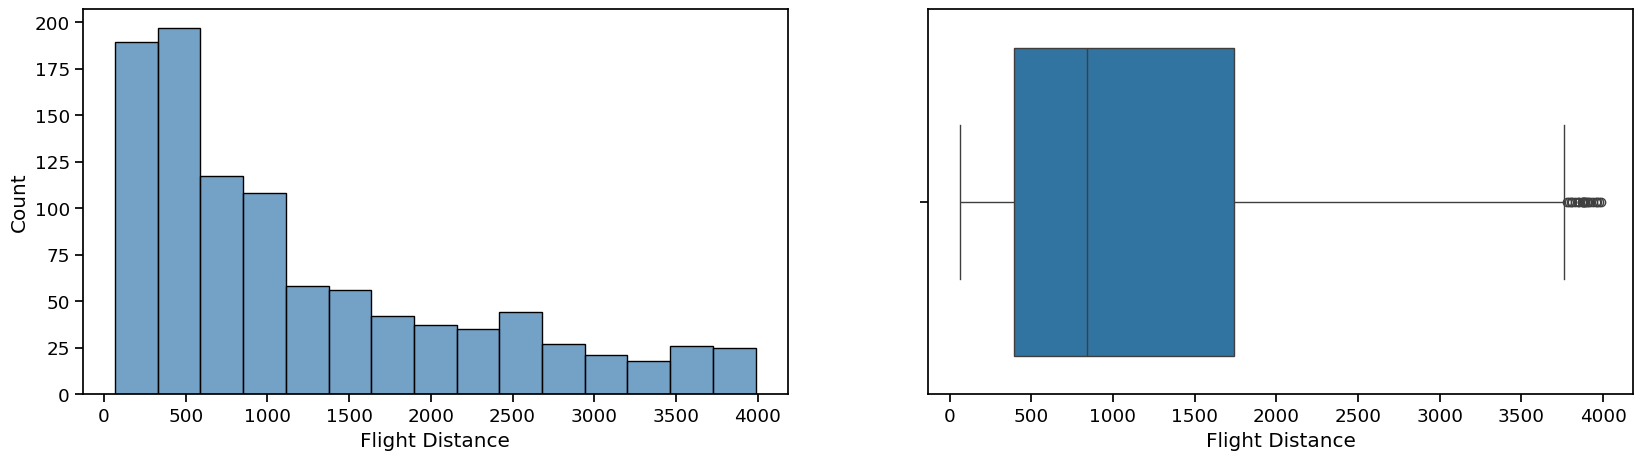

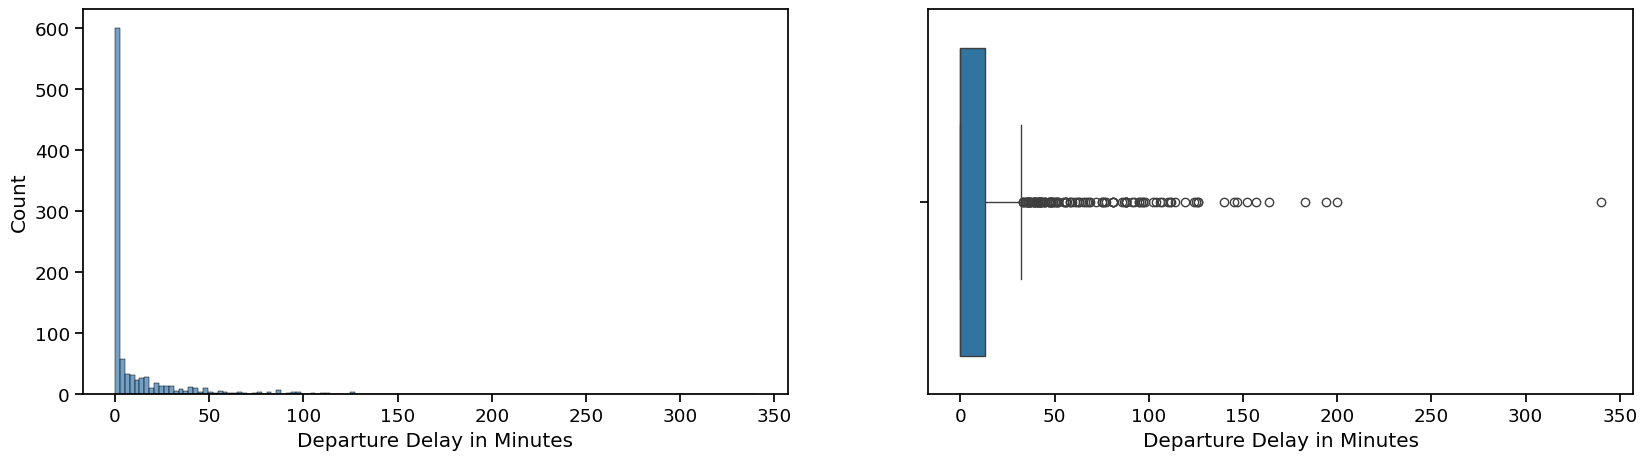

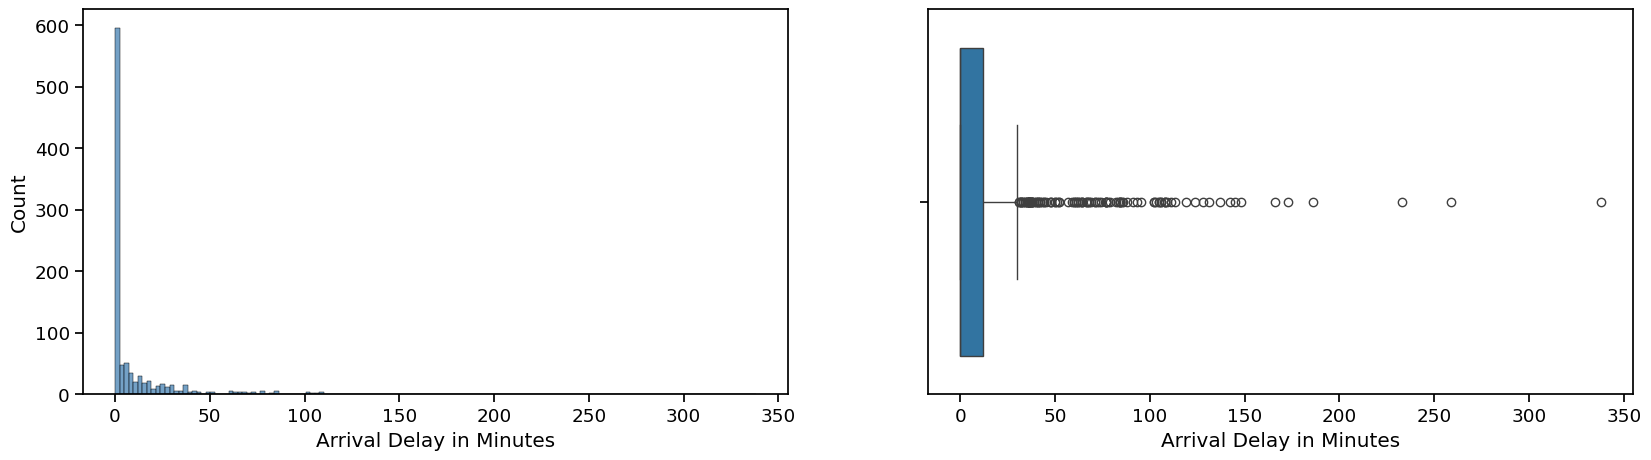

In [49]:
sns.set_context('notebook', font_scale=1.2)
for col in numerical_columns:
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    sns.histplot(sample_data[col], ax=ax[0], color='steelblue')
    sns.boxplot(x=sample_data[col], ax=ax[1])

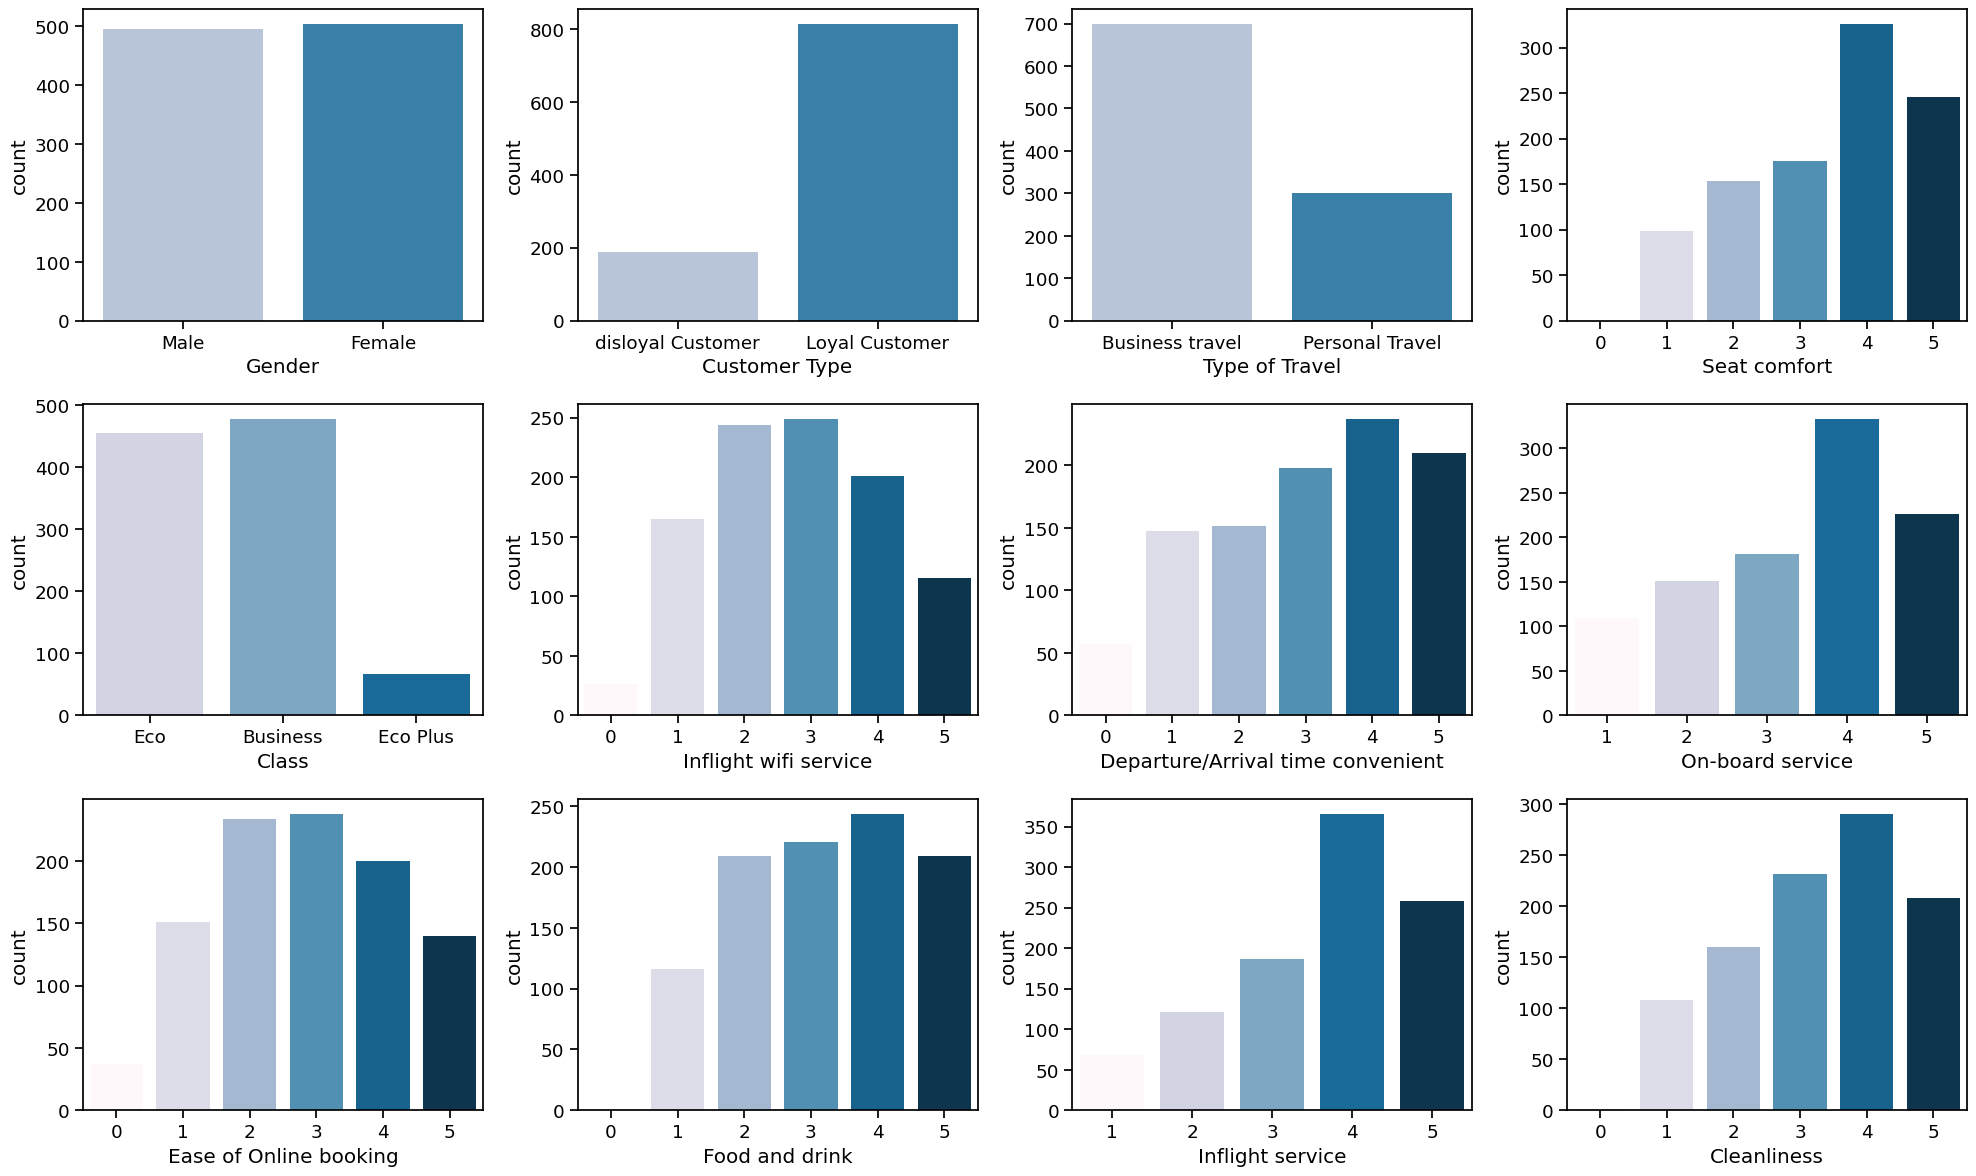

In [50]:
fig, axes = plt.subplots(3, 4, figsize=(20, 12))

sns.countplot(x='Gender', data=sample_data, hue='Gender', palette='PuBu', ax=axes[0, 0], legend=False)
sns.countplot(x='Customer Type', data=sample_data, hue='Customer Type', palette='PuBu', ax=axes[0, 1], legend=False)
sns.countplot(x='Type of Travel', data=sample_data, hue='Type of Travel', palette='PuBu', ax=axes[0, 2], legend=False)
sns.countplot(x='Seat comfort', data=sample_data, hue='Seat comfort', palette='PuBu', ax=axes[0, 3], legend=False)
sns.countplot(x='Class', data=sample_data, hue='Class', palette='PuBu', ax=axes[1, 0], legend=False)
sns.countplot(x='Inflight wifi service', data=sample_data, hue='Inflight wifi service', palette='PuBu', ax=axes[1, 1], legend=False)
sns.countplot(x='Departure/Arrival time convenient', data=sample_data, hue='Departure/Arrival time convenient', palette='PuBu', ax=axes[1, 2], legend=False)
sns.countplot(x='On-board service', data=sample_data, hue='On-board service', palette='PuBu', ax=axes[1, 3], legend=False)
sns.countplot(x='Ease of Online booking', data=sample_data, hue='Ease of Online booking', palette='PuBu', ax=axes[2, 0], legend=False)
sns.countplot(x='Food and drink', data=sample_data, hue='Food and drink', palette='PuBu', ax=axes[2, 1], legend=False)
sns.countplot(x='Inflight service', data=sample_data, hue='Inflight service', palette='PuBu', ax=axes[2, 2], legend=False)
sns.countplot(x='Cleanliness', data=sample_data, hue='Cleanliness', palette='PuBu', ax=axes[2, 3], legend=False)

plt.tight_layout()
plt.show()

# **Data Cleaning**

In [51]:
train_data.isnull().sum()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


In [52]:
median_val = train_data['Arrival Delay in Minutes'].median()
# Filling missing values with median as distribution of arrival delay was heavily skewed
train_data['Arrival Delay in Minutes'] = train_data['Arrival Delay in Minutes'].fillna(median_val)
test_data['Arrival Delay in Minutes'] = test_data['Arrival Delay in Minutes'].fillna(median_val)

In [53]:
train_data[cols].nunique()

,0
Inflight wifi service,6
Departure/Arrival time convenient,6
Ease of Online booking,6
Gate location,6
Food and drink,6
Online boarding,6
Seat comfort,6
Inflight entertainment,6
On-board service,6
Leg room service,6


# **Feature Transformation**

In [54]:
#Log Transformer
train_data['Flight Distance'] = np.log1p(train_data['Flight Distance'])
test_data['Flight Distance'] = np.log1p(test_data['Flight Distance'])
test_data['Arrival Delay in Minutes'] = np.log1p(test_data['Arrival Delay in Minutes'])

In [55]:
#Encoding
train_data['Gender'] = train_data['Gender'].map({'Male' : 0, 'Female' : 1})
train_data['Customer Type'] = train_data['Customer Type'].map({'Loyal Customer' : 0, 'disloyal Customer' : 1})
train_data['Type of Travel'] = train_data['Type of Travel'].map({'Personal Travel' : 0, 'Business travel' : 1})
train_data['Class'] = train_data['Class'].map({'Business' : 2, 'Eco Plus' : 1, 'Eco' : 0})
train_data['satisfaction'] = train_data['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})

test_data['Gender'] = test_data['Gender'].map({'Male' : 0, 'Female' : 1})
test_data['Customer Type'] = test_data['Customer Type'].map({'Loyal Customer' : 0, 'disloyal Customer' : 1})
test_data['Type of Travel'] = test_data['Type of Travel'].map({'Personal Travel' : 0, 'Business travel' : 1})
test_data['Class'] = test_data['Class'].map({'Business' : 2, 'Eco Plus' : 1, 'Eco' : 0})
test_data['satisfaction'] = test_data['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})

In [56]:
#Feature Scaling
X_train = train_data.drop('satisfaction', axis = 1)
y_train = train_data.satisfaction

X_test = test_data.drop('satisfaction', axis=1)
y_test = test_data.satisfaction

In [57]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

# **K-Nearest Neighbors**

In [59]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train, y_train)
k = KFold(n_splits = 5)
score = cross_val_score(knn, X_train, y_train, scoring = 'accuracy', cv = k).mean()
print("Accuracy on the training set:", round(score, 3))

Accuracy on the training set: 0.925


In [60]:
y_pred = knn.predict(X_test)
print("Accuracy on the test set:", round(accuracy_score(y_test, y_pred), 3))

Accuracy on the test set: 0.925


In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93     14573
           1       0.94      0.89      0.91     11403

    accuracy                           0.93     25976
   macro avg       0.93      0.92      0.92     25976
weighted avg       0.93      0.93      0.93     25976



# **Selecting K Value**

In [62]:
accuracy = []
for i in range(1,15):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    accuracy_i = accuracy_score(y_test, pred_i)
    accuracy.append(accuracy_i)

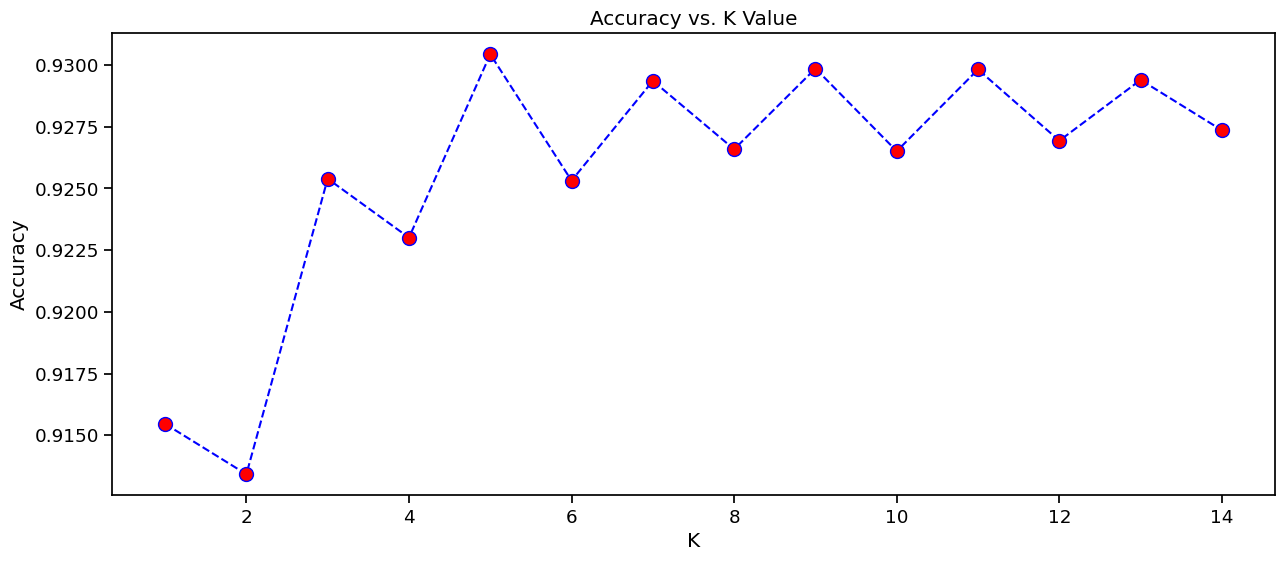

In [63]:
plt.figure(figsize=(15,6))
plt.plot(range(1,15, 1), accuracy, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [64]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# **Evaluation**

In [65]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy * 100, 2)}%")

Accuracy: 93.04%


In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     14573
           1       0.95      0.89      0.92     11403

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



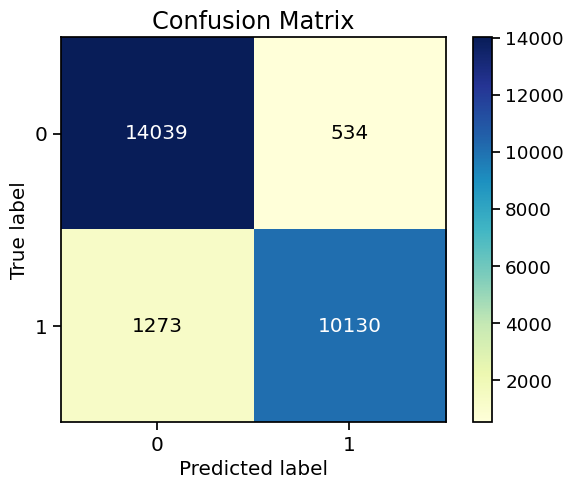

In [70]:
scikitplot.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(7,5), cmap= 'YlGnBu');

<div style="background-color:#bfbfbf; padding:8px; border:2px dotted black; border-radius:8px; font-family:sans-serif; line-height: 1.7em">

**Overfitting and Underfitting in KNN**

**Overfitting**

1.   When the value of k is very small (e.g., k=1), the model tends to memorize the data points, and each test point is classified based on the nearest training point. This can lead to poor generalization, as the model is highly sensitive to noise in the data.

2.   With a small k, the model has high variance, meaning it can easily adapt to the idiosyncrasies of the training data.

**Underfitting**

1.   When k is large, the model tends to take into account a large number of neighbors, which may dilute the influence of individual data points. This causes the model to become overly simplistic, failing to capture the complexity of the data.
2.   With a large k, the model has high bias because it generalizes too much and cannot capture the fine details of the data.

</div>
